In [2]:
import pandas as pd
import datetime as dt

### Cleaning the data

* drop unnamed:18
* fill in the null value with  0's for the different delay
* change the date to an actual datetime

In [3]:
data = pd.read_csv('flight_data.csv')
airport = pd.read_csv('airport.csv')
cancellation = pd.read_csv('cancellation.csv')

In [4]:
data.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 18
0,2018-12-01,EV,4342,TYS,IAH,1150,1230.0,40.0,1322,1357.0,35.0,0.0,NaN,0.0,1.0,0.0,0.0,34.0,NaN
1,2018-12-01,EV,4343,LIT,IAH,1405,1427.0,22.0,1540,1549.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-01,EV,4344,IAH,GSP,1940,1936.0,0.0,2254,2241.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-01,EV,4345,IND,EWR,1600,1553.0,0.0,1805,1747.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-01,EV,4348,ORD,FSD,2105,NaN,NaN,2300,NaN,NaN,1.0,B,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.drop('Unnamed: 18', axis=1)

In [6]:
data = data.fillna({'CARRIER_DELAY': 0, 'WEATHER_DELAY': 0, 'NAS_DELAY': 0, 'SECURITY_DELAY': 0, 'LATE_AIRCRAFT_DELAY': 0})

In [7]:
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'], format="%Y/%m/%d")

In [8]:
data = data.astype({'CRS_DEP_TIME': 'object', 'DEP_TIME': 'object', 'CRS_ARR_TIME': 'object', 'ARR_TIME': 'object'})

### Analysis
* create a column called total departure delay time using list comprehension
* use higher order function to find the date with the greatest avg departing delay time
* create a column to find the total delay (departure + arrival)

In [9]:
data['TOTAL_DEP_DELAY'] = [a + b + c + d + e for a, b, c, d, e in zip(data['CARRIER_DELAY'], data['WEATHER_DELAY'], data['NAS_DELAY'], data['SECURITY_DELAY'], data['LATE_AIRCRAFT_DELAY'])]

In [10]:
avg_delay = data['DEP_DELAY_NEW'].groupby(data['FL_DATE']).mean()

In [11]:
data['TOTAL_DELAY'] = [a + b for a, b in zip(data['DEP_DELAY_NEW'],data['ARR_DELAY_NEW'])]

In [12]:
data.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_DEP_DELAY,TOTAL_DELAY
0,2018-12-01,EV,4342,TYS,IAH,1150,1230,40.0,1322,1357,35.0,0.0,NaN,0.0,1.0,0.0,0.0,34.0,35.0,75.0
1,2018-12-01,EV,4343,LIT,IAH,1405,1427,22.0,1540,1549,9.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,2018-12-01,EV,4344,IAH,GSP,1940,1936,0.0,2254,2241,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-01,EV,4345,IND,EWR,1600,1553,0.0,1805,1747,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-01,EV,4348,ORD,FSD,2105,NaN,NaN,2300,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

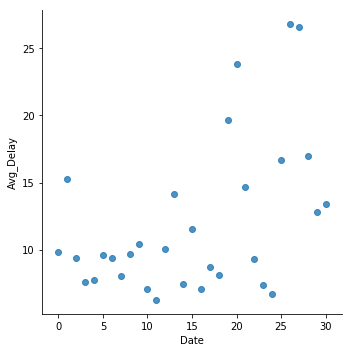

In [14]:
frame = {'Avg_Delay' : avg_delay.values, 'Date' : [i for i in range(31)]}
delay_pd = pd.DataFrame(frame)
sns.lmplot('Date', 'Avg_Delay', data=delay_pd, fit_reg=False)

C:\Users\Joey Park\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


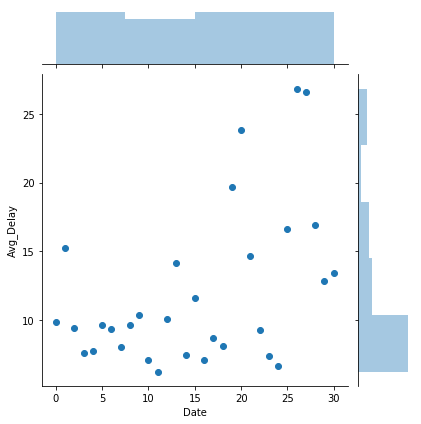

In [15]:
sns.jointplot(x="Date", y="Avg_Delay", data=delay_pd)